<a href="https://colab.research.google.com/github/srosamont/Projects_Ironhack/blob/master/NYC_ride_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [12]:
# Lire fichier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path="/content/drive/My Drive/Data/train_2014.csv"

In [14]:
%%time

df_2014=pd.read_csv(path)


CPU times: user 16.6 s, sys: 2.57 s, total: 19.2 s
Wall time: 22.1 s


CPU times: user 15.2 s, sys: 2.45 s, total: 17.7 s
Wall time: 22.1 s


In [15]:
%%time
import pickle
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))


CPU times: user 6.52 s, sys: 1.7 s, total: 8.22 s
Wall time: 10 s


In [3]:
#Unpickle
import pickle
df_2014=pickle.load( open('fichier2014lu.sav', "rb" ) )


EOFError: ignored

In [16]:
df_2014.shape


(8252682, 8)

In [17]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252682 entries, 0 to 8252681
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 503.7+ MB


In [18]:
df_2014.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [19]:
#deleting 4 rows with missing values in dropoff columns.
df_2014.dropna(axis=0,inplace=True)

In [20]:
df_2014.drop_duplicates(inplace=True)

In [21]:
df_2014.pickup_datetime.unique() #df_2013.pickup_datetime.unique()

array(['2014-02-19 07:22:00 UTC', '2014-12-06 20:36:22 UTC',
       '2014-02-19 16:03:00 UTC', ..., '2014-07-31 09:06:06 UTC',
       '2014-05-02 07:36:20 UTC', '2014-03-04 22:25:01 UTC'], dtype=object)

In [22]:
%%time
df_2014['date']=pd.to_datetime(df_2014['pickup_datetime'])

CPU times: user 16min 47s, sys: 154 ms, total: 16min 48s
Wall time: 16min 48s


In [23]:
#Creer un fichier pickle pour sauver 
filename1 = 'fichier2014datetransformed.sav'
pickle.dump(df_2014, open(filename1, 'wb'))

In [31]:
#Unpickle

df_2014=pickle.load( open('fichier2014datetransformed.sav', "rb" ) )

In [32]:
%%time
# Month of year
df_2014['month'] = df_2014['date'].dt.month_name()
# Week of year
df_2014['week_nb'] = df_2014['date'].dt.week
# Day of week
df_2014['weekday'] = df_2014['date'].dt.day_name()
# Day of year (quantieme)
df_2014['day_nb'] = df_2014['date'].dt.dayofyear
# Hour of the day 
df_2014['hour'] = df_2014['date'].dt.hour
# Day of the month
df_2014['Month_day'] = df_2014['date'].dt.day

CPU times: user 8.9 s, sys: 706 ms, total: 9.61 s
Wall time: 9.61 s


In [33]:
df_2014['week_nb'].unique().size

52

In [34]:
df_2014['weekday'].unique()

array(['Wednesday', 'Saturday', 'Thursday', 'Friday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [35]:
df_2014['month'].unique()

array(['February', 'December', 'July', 'May', 'January', 'April', 'June',
       'March', 'October', 'November', 'September', 'August'],
      dtype=object)

In [36]:
df_2014['day_nb'].unique().size

365

In [37]:
df_2014.pickup_longitude.value_counts()
#drop longitudes at 0 (greenwich meridians)
#drop latitudes at 0 (Eaquateur)

 0.000000     164201
-73.982220       917
-73.982140       908
-73.982310       867
-73.982130       866
               ...  
-73.869446         1
-73.935113         1
-73.898072         1
-73.794746         1
-73.930103         1
Name: pickup_longitude, Length: 158297, dtype: int64

In [26]:
#drop latitudes at 0 (Equateur)
df_2014.pickup_latitude.value_counts()

0.000000     164201
40.759360       942
40.758277       892
40.758282       878
40.758187       851
              ...  
40.664545         1
40.813369         1
40.633295         1
40.844619         1
40.701961         1
Name: pickup_latitude, Length: 178806, dtype: int64

In [38]:
df_2014=df_2014[df_2014.pickup_latitude!=0]

In [39]:
df_2014.pickup_longitude.value_counts()

-73.982220    917
-73.982140    908
-73.982310    867
-73.982130    866
-73.982320    859
             ... 
-74.078191      1
-73.696833      1
-73.806208      1
-73.792092      1
-73.895418      1
Name: pickup_longitude, Length: 158296, dtype: int64

In [41]:
df_2014=df_2014[df_2014.dropoff_latitude!=0]

In [45]:
df_2014.pickup_latitude.value_counts()

40.759360    930
40.758277    878
40.758282    871
40.758187    839
40.758457    827
            ... 
40.680671      1
40.833605      1
40.852722      1
40.647713      1
40.649535      1
Name: pickup_latitude, Length: 178585, dtype: int64

In [48]:
df_2014.passenger_count.value_counts()

1    5681525
2    1128414
5     455691
3     340840
6     301150
4     165332
9          9
7          6
8          3
Name: passenger_count, dtype: int64

In [35]:
#remove rides with 208 passengers . It is certainly an error. removed while rempving the matitude and longitude at 0
df_2014=df_2014[df_2014.passenger_count!=208]

In [47]:
#remove rides with 0 passenger even if they may be rides to transfer parcels or documents
df_2014=df_2014[df_2014.passenger_count!=0]

In [50]:
df_2014.fare_amount.value_counts()

6.50      393717
6.00      390405
7.00      385514
5.50      377676
7.50      373789
           ...  
49.51          1
164.45         1
49.99          1
54.01          1
13.30          1
Name: fare_amount, Length: 3012, dtype: int64

In [51]:
df_2014.fare_amount.max()

500.0

In [52]:
df_2014.fare_amount.min()

0.0

In [55]:
# drop the 10 occurences with a 0 amount
df_2014=df_2014[df_2014.fare_amount!=0]

In [56]:
df_2014[df_2014.fare_amount==500.0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day
6560865,2014-01-29 01:52:34.0000001,500.0,2014-01-29 01:52:34 UTC,-73.977378,40.742028,-73.977378,40.742028,1,2014-01-29 01:52:34+00:00,January,5,Wednesday,29,1,29
6987748,2014-03-18 09:39:22.0000003,500.0,2014-03-18 09:39:22 UTC,-73.851255,40.726820,-73.851255,40.726820,1,2014-03-18 09:39:22+00:00,March,12,Tuesday,77,9,18


In [ ]:
%%time
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))
filename2 = 'fichier2014lu.sav'
pickle.dump(df_2013, open(filename2, 'wb'))

In [57]:
%%time
df_2014.to_csv('/content/drive/My Drive/Data/train_2014Clean.csv')

In [58]:
#Creer un fichier pickle pour sauver dataframe 2014 clean
filename2 = 'dataFrame2014clean.sav'
pickle.dump(df_2014, open(filename2, 'wb'))

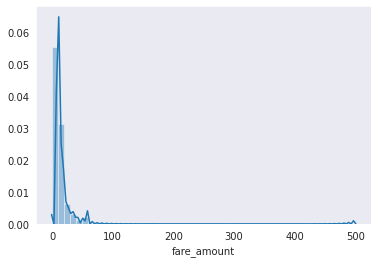

In [59]:
# Plot distribution of fare_amount
sns.distplot(df_2014['fare_amount'])
# fare mount is kind of log normal distribution

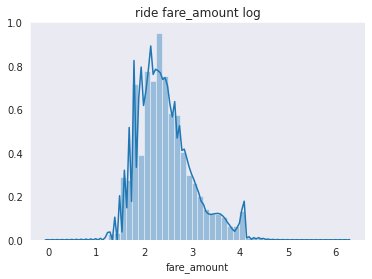

In [61]:
sns.distplot(np.log1p(df_2014['fare_amount']))
plt.title('ride fare_amount log')
plt.show()

# Distance calculation